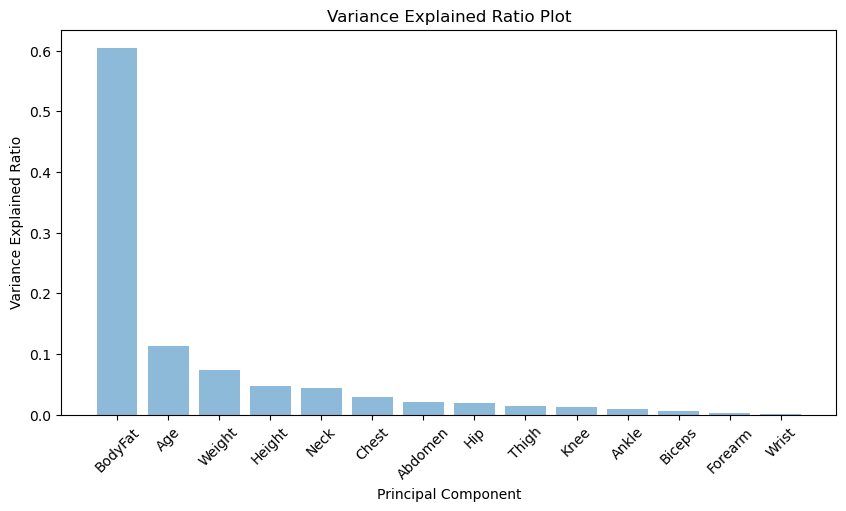

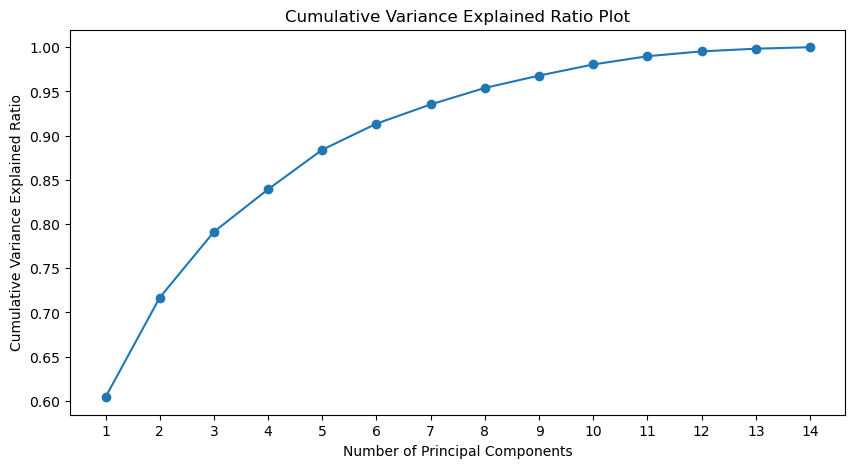

    Feature  Variance Ratio
0   BodyFat        0.604145
1       Age        0.112657
2    Weight        0.074375
3    Height        0.048138
4      Neck        0.044746
5     Chest        0.029498
6   Abdomen        0.021736
7       Hip        0.018654
8     Thigh        0.013966
9      Knee        0.012582
10    Ankle        0.009325
11   Biceps        0.005498
12  Forearm        0.003007
13    Wrist        0.001674

The 'Density' column is determined from underwater weighing and is not an independent feature. 
Including it in the analysis could lead to data leakage or bias in the results.
Therefore, it was dropped from the analysis to ensure the independence of the features.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset 
data = pd.read_csv(r"D:\Mehek\bodyfat.csv")

# Extract features
features = data.drop(['Density'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Variance explained ratio plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained Ratio Plot')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1), features.columns, rotation=45)
plt.show()

# Cumulative variance explained ratio plot
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained Ratio')
plt.title('Cumulative Variance Explained Ratio Plot')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.show()

# List up the features with their ratio
features_ratios = pd.DataFrame({'Feature': features.columns, 'Variance Ratio': pca.explained_variance_ratio_})
print(features_ratios)

# Explanation for dropping the 'Density' column
explanation = """
The 'Density' column is determined from underwater weighing and is not an independent feature. 
Including it in the analysis could lead to data leakage or bias in the results.
Therefore, it was dropped from the analysis to ensure the independence of the features.
"""
print(explanation)
